**Importing the Data**

Target: Sales Price
- What month is the best time to buy?
    - Year: last two years of model set. 
- How many bathrooms are best? 
- What condition should be best? 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.formula.api import ols
import os

In [2]:
df = pd.read_csv('data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [3]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [6]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [12]:
df['bathrooms'].duplicated().sum()

21568

In [7]:
list(df.columns)

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [8]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


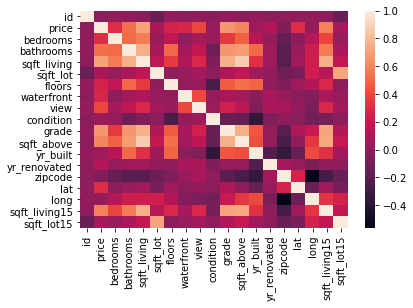

In [9]:
corr = df.corr()
sns.heatmap(corr);

In [10]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.395734
bedrooms         0.308787
lat              0.306692
waterfront       0.276295
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

**Group Months and Average Sale Price then do box plot of each month.**

In [11]:
df['date'] = pd.to_datetime(df['date'].str.strip())
df['Month'] = df['date'].dt.month
df['Day'] = df['date'].dt.day

In [12]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Month,Day
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,10,13
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,12,9
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,2,25
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,12,9
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2,18


In [132]:
df_mp = df[['Month', 'price']]
df_mp

,Month,price
0,10,221900.0
1,12,538000.0
2,2,180000.0
3,12,604000.0
4,2,510000.0
...,...,...
21592,5,360000.0
21593,2,400000.0
21594,6,402101.0
21595,1,400000.0


In [133]:
df_mp = df_mp.drop_duplicates()
df_mp

,Month,price
0,10,221900.0
1,12,538000.0
2,2,180000.0
3,12,604000.0
4,2,510000.0
...,...,...
21582,10,541800.0
21584,10,1540000.0
21587,8,507250.0
21589,10,610685.0


In [134]:
df_mp.info()
df_mp['price'].astype('int64')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10134 entries, 0 to 21594
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   10134 non-null  int64  
 1   price   10134 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 237.5 KB


0         221900
1         538000
2         180000
3         604000
4         510000
          ...   
21582     541800
21584    1540000
21587     507250
21589     610685
21594     402101
Name: price, Length: 10134, dtype: int64

In [138]:
df_mp1 = df_mp.groupby('Month')['price'].mean()

In [139]:
df_mp1

Month
1     576665.591985
2     554967.214180
3     574399.066372
4     599240.896480
5     599022.686180
6     602711.514523
7     578677.720202
8     588485.286830
9     574327.256903
10    581666.594318
11    568592.302613
12    578912.331445
Name: price, dtype: float64

<AxesSubplot:xlabel='Month', ylabel='Count'>

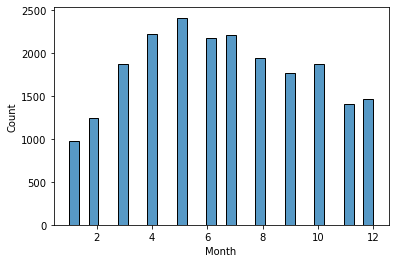

In [14]:
sns.histplot(data=df_mp, x="Month")

- Most houses are purchased in month of May and April.
- Why?

In [15]:
price = df[['bathrooms', 'price', 'grade', 'sqft_living']].reset_index()
price = price.set_index('price').reset_index()
price

,price,index,bathrooms,grade,sqft_living
0,221900.0,0,1.00,7,1180
1,538000.0,1,2.25,7,2570
2,180000.0,2,1.00,6,770
3,604000.0,3,3.00,7,1960
4,510000.0,4,2.00,8,1680
...,...,...,...,...,...
21592,360000.0,21592,2.50,8,1530
21593,400000.0,21593,2.50,8,2310
21594,402101.0,21594,0.75,7,1020
21595,400000.0,21595,2.50,8,1600


**Looking at bathrooms**

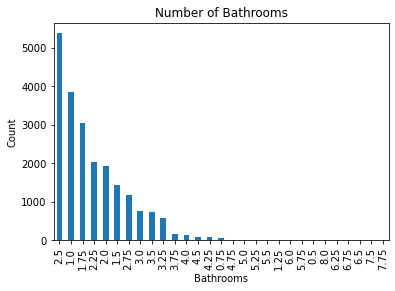

In [16]:
df['bathrooms'].value_counts().plot(kind='bar')
plt.title('Number of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Count')
sns.despine;

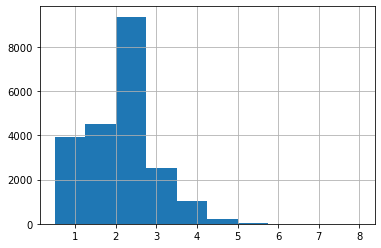

In [17]:
price['bathrooms'].hist();

- Most houses sold have 1 and 2.5 bathrooms. 
- Kind of a normal distribution; mean is 2.11 bathrooms; outliers after 4.

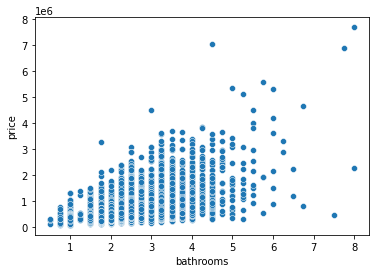

In [18]:
sns.scatterplot(data=price, x="bathrooms", y="price");

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

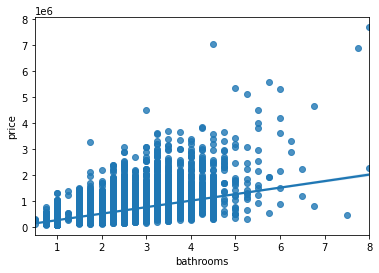

In [19]:
sns.regplot(x="bathrooms", y="price", data=price)

In [20]:
fsm_bathroom = price[['price', 'bathrooms']].copy()

In [23]:
fsm = ols(formula='price~bathrooms', data=fsm_bathroom)
fsm_br_results = fsm.fit()
fsm_br_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     8256.
Date:                Thu, 22 Apr 2021   Prob (F-statistic):               0.00
Time:                        11:45:08   Log-Likelihood:            -3.0389e+05
No. Observations:               21597   AIC:                         6.078e+05
Df Residuals:                   21595   BIC:                         6.078e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8712.6518   6224.769      1.400      0.162   -3488.356    2.09e+04
bathrooms   2.512e+05   2765.054     90.863      0.000    2.46e+05    2.57e+05
==============================================================================
Omnibus:                    17251.570   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           882735.889
Skew:                           3.452   Prob(JB):                         0.00
Kurtosis:                      33.550   Cond. No.                         7.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- for every "house" without bathroom that has bathroom set to 0, cost on average ~8.7k. with increase of 1 bathroom, we would expect 251000 dollars increase on average
- This model finds intercept to be statistically non-significant

-investigate outliers, check assumptions - linear relation, homo, independence

**Looking at condition of house**

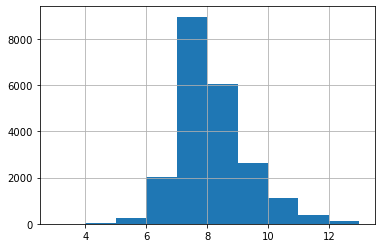

In [21]:
price['grade'].hist();

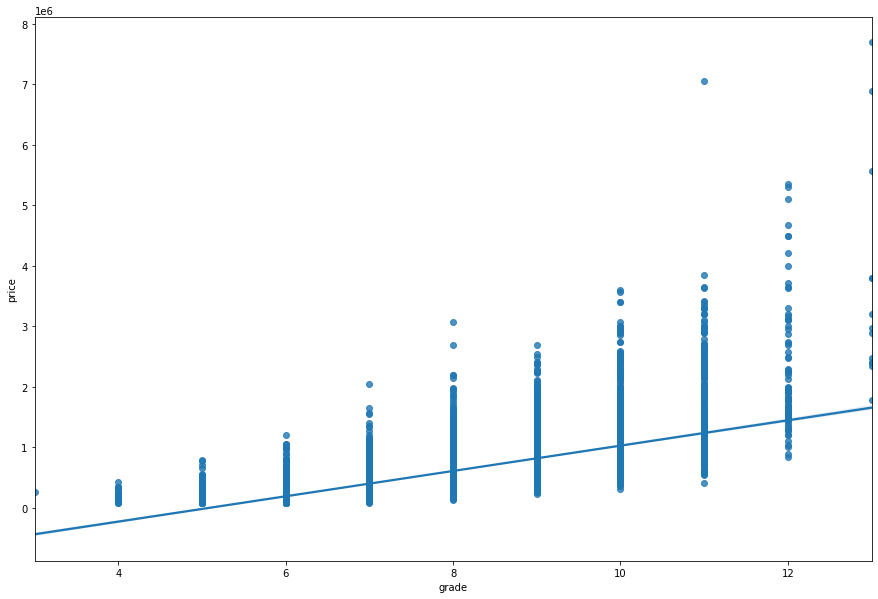

In [22]:
plt.figure(figsize=(15,10))
sns.regplot(x="grade", y="price", data=price);

In [ ]:
plt.figure(figsize=(15,10))
sns.regplot(df.grade.transform(lambda x: (x-x.mean()/x.std()));

In [24]:
np.corrcoef(df.grade, df.price)[0][1]

0.6679507713876449

In [23]:
exponents = range(1,5)
for e in exponents:
    score = np.corrcoef(df.grade**e, df.price)[0][1]
    score = np.abs(score)
    if score > 0:
        best_score = score
        best_e = e

In [25]:
best_e

4

In [26]:
fsm_grade = price[['price', 'grade']].copy()

In [27]:
fsm_g = ols(formula='price~grade', data=fsm_grade)
fsm_g_results = fsm_g.fit()
fsm_g_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                 1.740e+04
Date:                Thu, 22 Apr 2021   Prob (F-statistic):               0.00
Time:                        14:39:36   Log-Likelihood:            -3.0101e+05
No. Observations:               21597   AIC:                         6.020e+05
Df Residuals:                   21595   BIC:                         6.020e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.061e+06   1.23e+04    -86.396      0.000   -1.09e+06   -1.04e+06
grade       2.092e+05   1585.790    131.895      0.000    2.06e+05    2.12e+05
==============================================================================
Omnibus:                    19879.964   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2043898.709
Skew:                           4.081   Prob(JB):                         0.00
Kurtosis:                      49.954   Cond. No.                         52.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- think about grade has an ordinal relation; does it have linear relationship? 
- average sales price with grades

<AxesSubplot:>

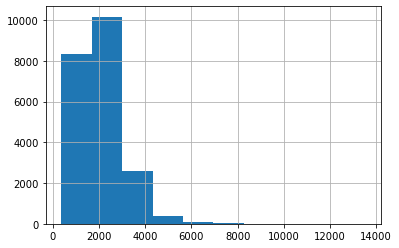

In [28]:
price['sqft_living'].hist()

In [31]:
fsm_living = price[['price', 'sqft_living']].copy()
fsm_live = ols(formula='price~sqft_living', data=fsm_living)
fsm_live_results = fsm_live.fit()
fsm_live_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Wed, 21 Apr 2021   Prob (F-statistic):               0.00
Time:                        11:27:24   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Bootstrapping categoricals

Boot strapping is sampling technique

**How it works**
1. Loop over a set number
2. Randomly sample from data with replacement. The sample size is equal to the size of the data we are sampling from.
3. Append the mean of the sample from step two to a list.

In [29]:
def bootstrap_categories(df, category, target, sample_count=200):
    unique=df[category].unique()
    
    for val in unique:
        samples=[]
        for i in range(sample_count):
            frame=df[df[category]==val]
            sample=np.random.choice(frame[target],size=frame.shape[0],replace=True)
            samples.append(sample.mean())
        plt.hist(samples, label=val,alpha=.7)
    plt.legend()

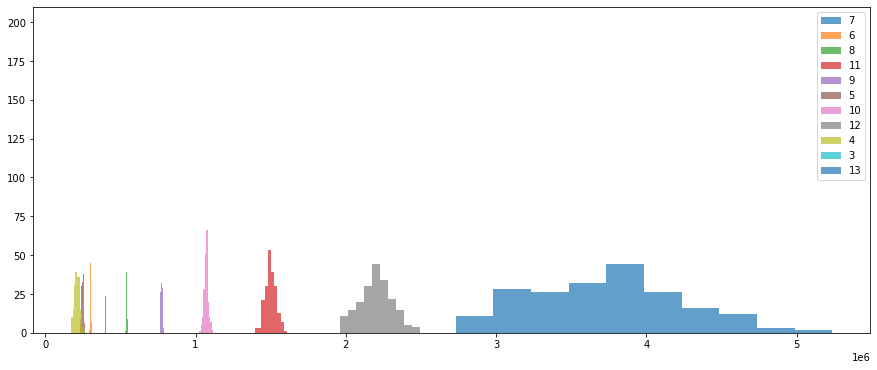

In [30]:
plt.figure(figsize=(15,6))
bootstrap_categories(df, 'grade', 'price')

- distrinctions between grades are clear. 
- as grades increase, prices increase so ordinal relationship.

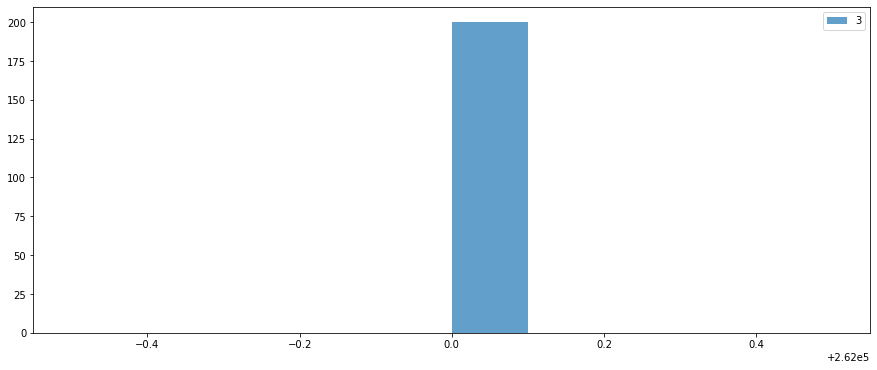

In [31]:
plt.figure(figsize=(15,6))
lower_grade=df[df['grade']==3]
bootstrap_categories(lower_grade, 'grade', 'price')

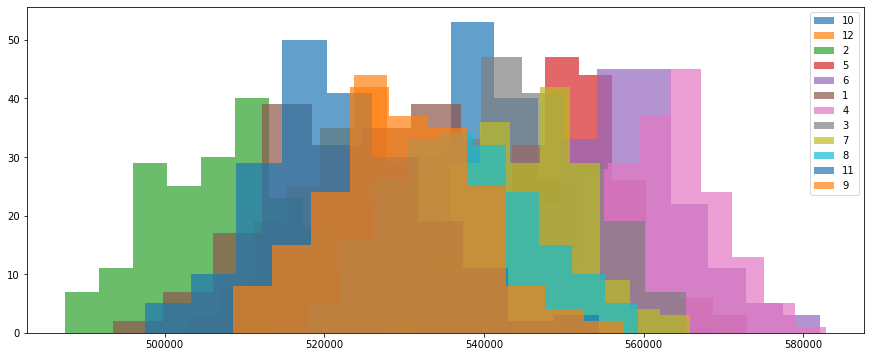

In [32]:
plt.figure(figsize=(15,6))
bootstrap_categories(df, 'Month', 'price')

- February shows the cheapest prices 
    - Post holidays, marketers and real estate agents want to start their year off strong.
- June shows the most expensive prices on average.
- However, based on the data shown above... on average, more houses are sold in April and May
    - Spring time means more showings, more showings means more home purchases
    - Mean price in June = 602k, where as mean in February is 554k. 10% premium.
        - Average house price in April and May are about 599k. Statistically not significant buying anywhere between April and June.
    

In [150]:
df_mp1

Month
1     576665.591985
2     554967.214180
3     574399.066372
4     599240.896480
5     599022.686180
6     602711.514523
7     578677.720202
8     588485.286830
9     574327.256903
10    581666.594318
11    568592.302613
12    578912.331445
Name: price, dtype: float64

C:\Users\Le\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1080x720 with 0 Axes>

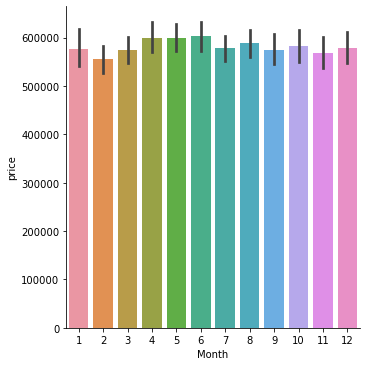

In [149]:
plt.figure(figsize=(15,10))
sns.catplot('Month', 'price', data=df_mp, kind='bar');

In [38]:
df_mp.duplicated().sum()

11463

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10134 entries, 0 to 21594
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   10134 non-null  int64  
 1   price   10134 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 237.5 KB


In [40]:
errors = []
for idx in df.index:
    val = df.sqft_basement[idx]
    try:
        float(val)
    except: 
        errors.append(idx)
df.iloc[errors]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Month,Day
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,?,1995,0.0,98003,47.3097,-122.327,2238,6819,6,27
18,16000397,2014-12-05,189000.0,2,1.00,1200,9850,1.0,0.0,0.0,...,?,1921,0.0,98002,47.3089,-122.210,1060,5095,12,5
42,7203220400,2014-07-07,861990.0,5,2.75,3595,5639,2.0,0.0,0.0,...,?,2014,0.0,98053,47.6848,-122.016,3625,5639,7,7
79,1531000030,2015-03-23,720000.0,4,2.50,3450,39683,2.0,0.0,0.0,...,?,2002,0.0,98010,47.3420,-122.025,3350,39750,3,23
112,2525310310,2014-09-16,272500.0,3,1.75,1540,12600,1.0,0.0,0.0,...,?,1980,0.0,98038,47.3624,-122.031,1540,11656,9,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21442,3226049565,2014-07-11,504600.0,5,3.00,2360,5000,1.0,0.0,0.0,...,?,2008,0.0,98103,47.6931,-122.330,2180,5009,7,11
21447,1760650900,2014-07-21,337500.0,4,2.50,2330,4907,2.0,0.0,0.0,...,?,2013,NaN,98042,47.3590,-122.081,2300,3836,7,21
21473,6021503707,2015-01-20,352500.0,2,2.50,980,1010,3.0,NaN,0.0,...,?,2008,0.0,98117,47.6844,-122.387,980,1023,1,20
21519,2909310100,2014-10-15,332000.0,4,2.50,2380,5737,2.0,0.0,0.0,...,?,2010,0.0,98023,47.2815,-122.356,2380,5396,10,15


In [34]:
df.sqft_basement = pd.to_numeric(df.sqft_basement, errors='coerce')

In [35]:
df.sqft_basement.isna().sum()

454

0          0.0
1        400.0
2          0.0
3        910.0
4          0.0
         ...  
21592      0.0
21593      0.0
21594      0.0
21595      0.0
21596      0.0
Name: sqft_basement, Length: 21143, dtype: float64

454